In [23]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier

from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.DataFrame.iteritems = pd.DataFrame.items

# Load data

In [2]:
hearth_failure = fetch_openml('Heart_Failure_Prediction_-_Clinical_Records_', version=1, parser='auto')

In [3]:
df_hearth = hearth_failure.data

# Data study

In [4]:
display(df_hearth)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0.0,748.0,0.0,45.0,0.0,263358.03,1.3,137.0,1.0,1.0,88.0,0.0
1,65.0,0.0,56.0,0.0,25.0,0.0,305000.00,5.0,130.0,1.0,0.0,207.0,0.0
2,45.0,0.0,582.0,1.0,38.0,0.0,319000.00,0.9,140.0,0.0,0.0,244.0,0.0
3,60.0,1.0,754.0,1.0,40.0,1.0,328000.00,1.2,126.0,1.0,0.0,90.0,0.0
4,95.0,1.0,582.0,0.0,30.0,0.0,461000.00,2.0,132.0,1.0,0.0,50.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0.0,582.0,1.0,55.0,0.0,543000.00,1.0,132.0,0.0,0.0,250.0,0.0
4996,60.0,1.0,582.0,0.0,30.0,1.0,127000.00,0.9,145.0,0.0,0.0,95.0,0.0
4997,95.0,1.0,112.0,0.0,40.0,1.0,196000.00,1.0,138.0,0.0,0.0,24.0,1.0
4998,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0


In [5]:
display(df_hearth.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   float64
 2   creatinine_phosphokinase  5000 non-null   float64
 3   diabetes                  5000 non-null   float64
 4   ejection_fraction         5000 non-null   float64
 5   high_blood_pressure       5000 non-null   float64
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   float64
 9   sex                       5000 non-null   float64
 10  smoking                   5000 non-null   float64
 11  time                      5000 non-null   float64
 12  DEATH_EVENT               5000 non-null   float64
dtypes: float64(13)
memory usage: 507.9 KB


None

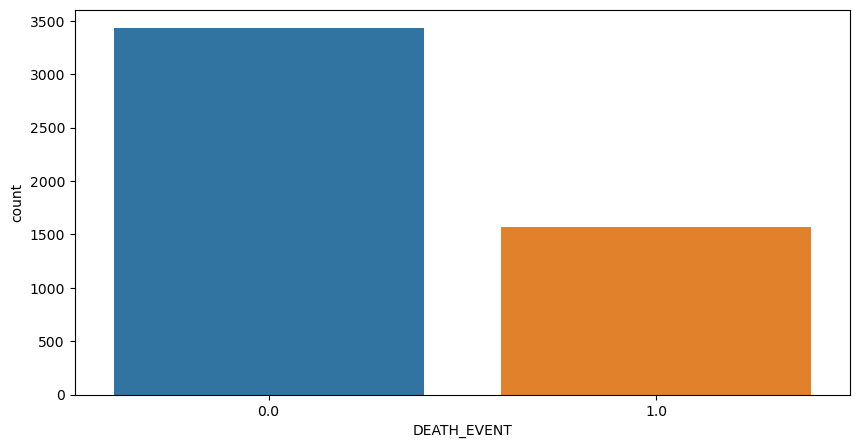

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df_hearth['DEATH_EVENT'])
plt.show()

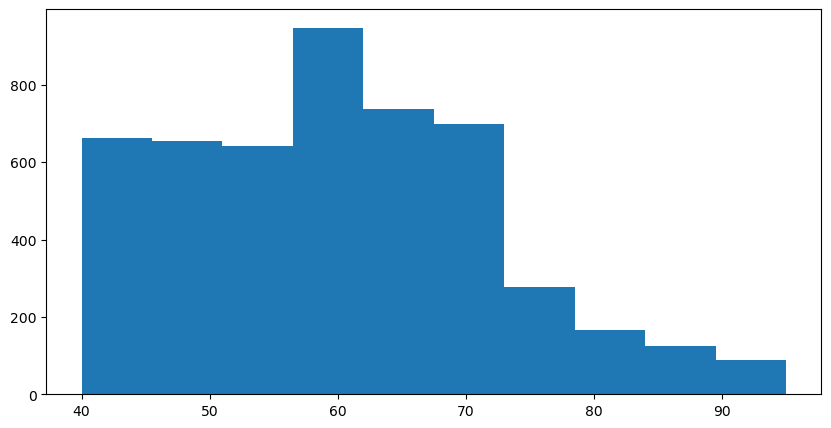

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(df_hearth['age'])
plt.show()

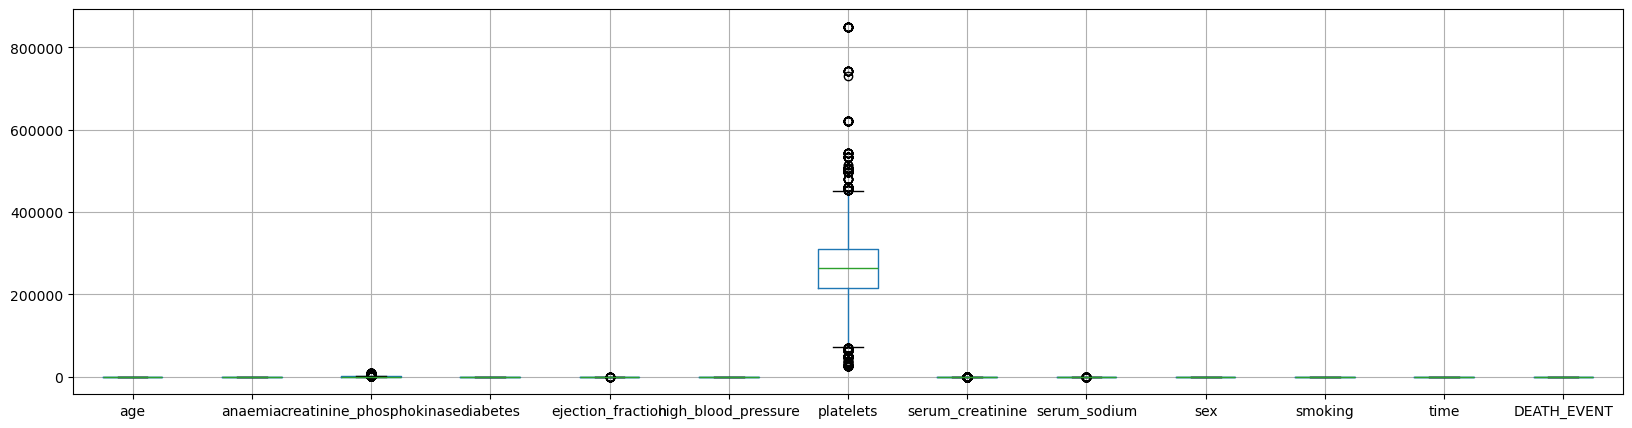

In [8]:
plt.figure(figsize=(20, 5))
df_hearth.boxplot()
plt.show()

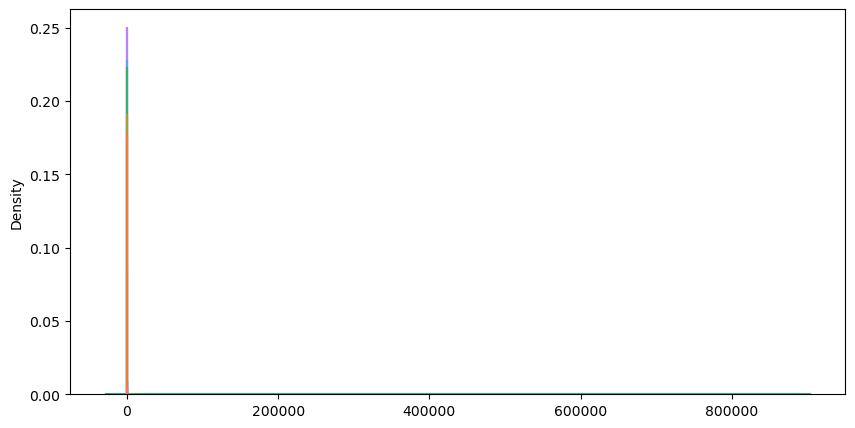

In [9]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df_hearth, legend=None)
plt.show()

# Data processing

In [10]:
X_hearth = df_hearth.drop('DEATH_EVENT', axis=1)
y_hearth = df_hearth['DEATH_EVENT']

In [11]:
X_hearth.shape, y_hearth.shape

((5000, 12), (5000,))

In [12]:
# Principal Component analysis
pca = PCA()
X_hearth = pca.fit_transform(X_hearth)

In [13]:
X_hearth.shape, y_hearth.shape

((5000, 12), (5000,))

In [14]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_hearth, y_hearth, 
                                                    test_size=0.3, shuffle=True,
                                                    stratify=y_hearth, random_state=42)

In [15]:
# train Arrays dimensions
X_train.shape, y_train.shape

((3500, 12), (3500,))

In [16]:
# test arrays dimensions
X_test.shape, y_test.shape

((1500, 12), (1500,))

In [17]:
# Data normalization, with MinMaxScaler
scaler  =MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<IPython.core.display.Javascript object>

# Model selection and evaluation

In [18]:
models=(
    ('LogisticRegression', LogisticRegression()),
    ('RandomForest', RandomForestClassifier()),
    ('SVC', SVC()),
    ('MLP', MLPClassifier()),
    ('SGD', SGDClassifier()),
    ('GBC', GradientBoostingClassifier()),
    ('GPC', GaussianProcessClassifier()))

score='recall'

In [19]:
for name, model in models:
    result = cross_val_score(model, X_train, y_train, scoring=score, cv=5)
    print(f'Model:{name}->Mean Score:{result.mean()}')

Model:LogisticRegression->Mean Score:0.7176670817766707
Model:RandomForest->Mean Score:0.9690369447903695
Model:SVC->Mean Score:0.8297011207970112
Model:MLP->Mean Score:0.808758821087588
Model:SGD->Mean Score:0.6730593607305936
Model:GBC->Mean Score:0.9608260689082607
Model:GPC->Mean Score:0.7340805313408053


0.9786666666666667


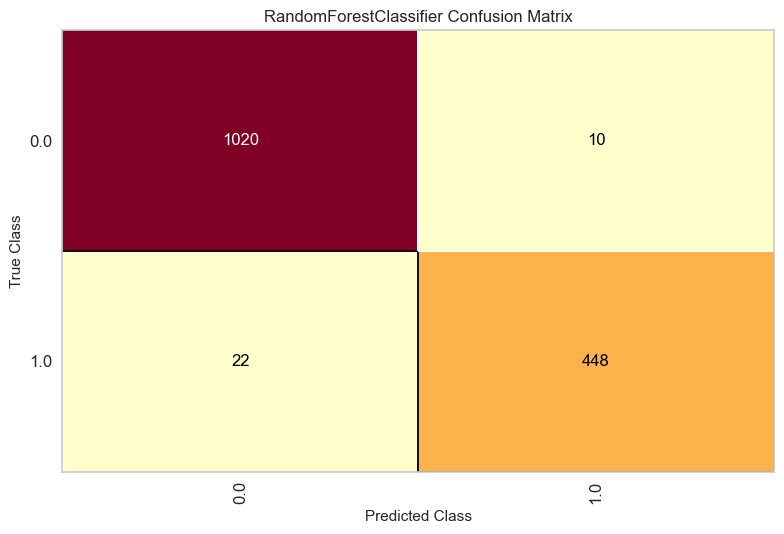

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1030
         1.0       0.98      0.95      0.97       470

    accuracy                           0.98      1500
   macro avg       0.98      0.97      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [22]:
best_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm=ConfusionMatrix(best_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()
print(classification_report(y_test, y_pred))